In [1]:
import sys
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
from environments.env_list.simple2d import Simple2D
from model.basic import ExcitInhibitoryplastic

In [2]:
room_width = 0.2
room_depth = 0.2
env_name = "env_example"
time_step_size = 0.1 
agent_step_size = 0.05
# Init environment
env = Simple2D(environment_name=env_name,
               room_width = room_width,
               room_depth = room_depth,
               time_step_size = time_step_size,
               agent_step_size = agent_step_size)



In [3]:
exc_eta_1=2e-15
inh_eta_1= 8e-15
model_name_1 = "model_example"
sigma_exc_1= 0.05
sigma_inh_1=0.2
Ne_1= 4900
Ni_1= 1225
alpha_inh_1=1
alpha_exc_1=1
    
agent=ExcitInhibitoryplastic(model_name= model_name_1,exc_eta=exc_eta_1,inh_eta=inh_eta_1, sigma_exc=sigma_exc_1, sigma_inh=sigma_inh_1, Ne=Ne_1, Ni= Ni_1, alpha_inh=alpha_inh_1,alpha_exc=alpha_exc_1)



In [ ]:
n_steps = 1000
agent.reset()
# Initialize environment
obs, state = env.reset()
for i in range(n_steps):
    # Observe to choose an action
    action = agent.act(obs)
    rate =  agent.update(action)
    # Run environment for given action
    obs, state, reward = env.step(action)


../model/basic.py:43: RuntimeWarning: overflow encountered in exp
  rates_exc_i=self.alpha_exc*np.exp(((x-mean).T@(x-mean)/self.sigma_exc))
../model/basic.py:59: RuntimeWarning: invalid value encountered in subtract
  self.rout = (np.dot(self.we,self.get_rates_exc_dup)- np.dot(self.wi,self.get_rates_inh_dup))


[ 0.09059712 -0.05681392]


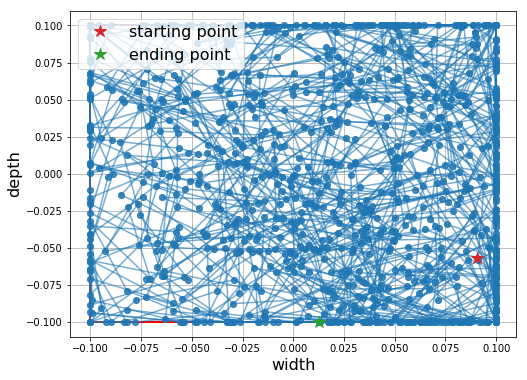

In [ ]:
ax = env.plot_trajectory()
fontsize = 16
ax.grid()
ax.legend(fontsize=fontsize, loc="upper left")
ax.set_xlabel("width", fontsize=fontsize)
ax.set_ylabel("depth", fontsize=fontsize)
plt.show()
X=agent.plot_rate(room_width, room_depth)
